In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
%matplotlib inline
import matplotlib.pyplot as plt

#import models
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from xgboost import XGBRegressor

from sklearn import model_selection
from sklearn.metrics import explained_variance_score
# from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from tabulate import _table_formats, tabulate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import pygad

from sklearn import metrics

In [2]:
datas = './MyData.xlsx'
# datas = '/Users/pkrok/OneDrive/Python/Giannakopoulos/MyData.xlsx'
# datas = '/Users/panagiotiskrokidas/OneDrive/Python/Giannakopoulos/MyData.xlsx'

In [3]:
pd.set_option("display.max_columns", None)
df=pd.read_excel(datas)
df.head(2)
df['logD'] = np.log10(df['diffusivity'])
# df = df.dropna()
# df[df.gas == 'propylene']['logD'].max()
df[df.gas == 'H2']['logD'].count()

61

# Keep only the columns I need

In [4]:
# df2=df[[ 'aperture', 'size - van der Waals (Å)','mass', 'ascentricF', 'logD', 'size - kinetic diameter (Å)', 'gas', 'apertureAtom_e', 'ionicRad']]
df2=df[[ 'aperture', 'size - van der Waals (Å)','mass', 'ascentricF', 'logD', 'size - kinetic diameter (Å)', 'ionicRad', 
       'Μ-N_lff', 'Μ-N_kFF', 'ionicRad', 'MetalCharge',
       'apertureAtom_σ', 'apertureAtom_e', 'linker_length1', 'linker_length2',
       'linker_length3', 'linker_mass1', 'linker_mass2', 'linker_mass3',
       'func1_length', 'func2_length', 'func3_length', 'func1_mass',  
       'func2_mass', 'func3_mass', 'func1_charge', 'func2_charge',
       'func3_charge',]]

In [5]:
df2=df2.rename(columns={'size - van der Waals (Å)':'diameter', 'size - kinetic diameter (Å)':'kdiameter', 'apertureAtom_e':'e' })

In [6]:
df2 = df2.dropna()
df2=df2.reset_index(drop=True)
df2

,aperture,diameter,mass,ascentricF,logD,kdiameter,ionicRad,Μ-N_lff,Μ-N_kFF,ionicRad,MetalCharge,apertureAtom_σ,e,linker_length1,linker_length2,linker_length3,linker_mass1,linker_mass2,linker_mass3,func1_length,func2_length,func3_length,func1_mass,func2_mass,func3_mass,func1_charge,func2_charge,func3_charge
0,3.92,2.66,4.002,-0.390,-7.221849,2.60,92,2.257,45354.60,92,1.1901,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
1,3.92,2.76,2.010,-0.217,-7.301030,2.89,92,2.257,45354.60,92,1.1901,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
2,3.92,2.94,31.999,0.022,-8.000000,3.46,92,2.257,45354.60,92,1.1901,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
3,3.92,3.24,44.010,0.225,-8.397940,3.30,92,2.257,45354.60,92,1.1901,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
4,3.92,3.13,28.000,0.037,-8.301030,3.64,92,2.257,45354.60,92,1.1901,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,2.95,2.76,2.010,-0.217,-7.455932,2.89,71,2.139,38994.88,71,1.9871,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2710,-0.2710,-0.2710
591,2.95,2.94,31.999,0.022,-9.180456,3.46,71,2.139,38994.88,71,1.9871,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2710,-0.2710,-0.2710
592,2.95,3.24,44.010,0.225,-9.096910,3.30,71,2.139,38994.88,71,1.9871,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2710,-0.2710,-0.2710
593,2.95,3.13,28.000,0.037,-9.638272,3.64,71,2.139,38994.88,71,1.9871,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2710,-0.2710,-0.2710


# Use only van der Waals

In [7]:
x_ar = np.array(df2[['aperture', 'diameter']])
# x_ar = np.asanyarray(df2[['aperture', 'diameter','mass', 'ascentricF', 'kdiameter', 'ionicRad']])
y_ar = np.array(df2[['logD']])

x1 = (df2[['aperture', 'diameter']])
# x1 = (df2[['aperture']])
y1 = (df2[['logD']])

## ML models

In [8]:
regr = linear_model.LinearRegression()
tree=DecisionTreeRegressor(max_depth=5,random_state=1)
print(regr)

LinearRegression()


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_ar, y_ar, test_size=0.3, random_state=None)

regression=regr.fit(x_train, y_train)
DT=tree.fit(x_train, y_train)

DT.predict([[1.0, 2.0]])

# list(np.arange(np.min(x_ar[:, 0]), np.max(x_ar[:, 0]), 0.1))
x_ar[0:2]

array([[3.92, 2.66],
       [3.92, 2.76]])

In [13]:
def fitness(solution, solution_idx):
    floatResult = regression.predict([solution])[0]
    # print(floatResult)
    # floatResult=floatResult[0]
    return 1.0 / (abs(floatResult - -12.0) + 10e-14)

In [14]:
fitness_function = fitness

num_generations = 2000
num_parents_mating = 7

sol_per_pop = 15

# num_genes = 30
# mutation_num_genes=2
mutation_probability = 0.01 #if this parameter exists, then there is no need for the 2 parameters mutation_percent_genes and mutation_num_genes. 
mutation_type = "random"

initial_population = x_ar[0:20]
# initial_population = [[2.3, 3.2], [2.5, 3.3]]
# gene_space = [[np.min(x_ar[:, 0]), np.max(x_ar[:, 0])], [3.2, 3.25]]
# gene_space = [range(np.min(x_ar[:, 0]), np.max(x_ar[:, 0])) [3.2, 3.25]]
# gene_space = [list(np.arange(np.min(x_ar[:, 0]), np.max(x_ar[:, 0]), 0.01)),[3.2, 3.25]]
# gene_space = [list(np.arange(np.min(x_ar[:, 0]), np.max(x_ar[:, 0]), 0.01)), list(np.arange(3.2, 3.4, 0.1))]
# gene_space = [[1.9, 2.0, 2.1, 2.2, 2.5, 2.8, 3.0], [3.2, 3.25]]
gene_space = [{"low": 1.9, "high": 3.8, "step" : 0.1},
              {"low": 3.2, "high": 3.25, "step" : 0.1}]

parent_selection_type = "tournament" #  "sss", "rws", "tournament", "rank", "random"
K_tournament=4
keep_parents = 6

crossover_type = "two_points" # single_point, two-points, uniform, scattered
crossover_probability = 0.3

In [23]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       initial_population = initial_population, 
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       # mutation_num_genes = mutation_num_genes,
                       gene_space = gene_space,
                       sol_per_pop = sol_per_pop,
                       # num_genes = num_genes,
                       crossover_probability = crossover_probability,
                       mutation_probability = mutation_probability,
                       K_tournament = K_tournament,
                       allow_duplicate_genes=False)

In [24]:
ga_instance.run()

In [26]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

prediction = regression.predict([solution])[0]
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Parameters of the best solution : [3.1 3.2]
Fitness value of the best solution = [4.16793279]
Predicted output based on the best solution : [-11.04334764]


In [870]:
# regression.predict([[1.9, 3.2]])

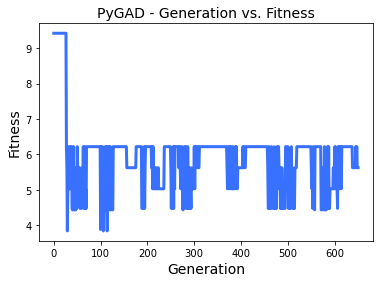

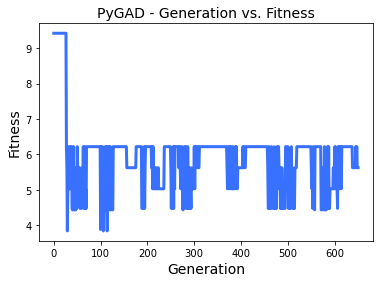

In [17]:
ga_instance.plot_fitness()

# ga_instance.plot_genes()

## Add more descriptors

In [ ]:
# x_ar = np.array(df2[['aperture', 'diameter']])
# x_ar = np.asanyarray(df2[['aperture', 'diameter', 'ionicRad', 'linker_length1', 'linker_length2',
#        'linker_length3', 'linker_mass1', 'linker_mass2', 'linker_mass3',
#        'func1_length', 'func2_length', 'func3_length', 'func1_mass',
#        'func2_mass', 'func3_mass','e' ]])

x_ar = np.asanyarray(df2[['aperture', 'diameter', 'linker_length1', 'linker_length2', 'linker_length3']])

y_ar = np.array(df2[['logD']])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_ar, y_ar, test_size=0.3, random_state=None)
regression=regr.fit(x_train, y_train)

In [ ]:
initialParameterValues = x_ar[0]
print(initialParameterValues)
# bounds = [(np.min(x_ar[:, 0]), np.max(x_ar[:, 0])), (np.min(x_ar[:, 1]), np.max(x_ar[:, 1]))]
bounds = [(np.min(x_ar[:, 0]), np.max(x_ar[:, 0])), 
          (3.2, 3.25),
         (np.min(x_ar[:, 2]), np.max(x_ar[:, 2])),
         (np.min(x_ar[:, 2]), np.max(x_ar[:, 3])),
         (np.min(x_ar[:, 2]), np.max(x_ar[:, 4]))]

print(str(bounds))

regression.predict([initialParameterValues])
def fitness(PARAMS, *args):
#     floatResult = regression.predict([PARAMS])[0][0]
    floatResult = regression.predict([PARAMS])[0][0]
    return abs(floatResult - -11.0)

res = minimize(fitness, initialParameterValues, bounds=bounds, method='L-BFGS-B')
print(str(res))

In [ ]:
print(str(bounds))

In [ ]:
x_ar[0]

In [ ]:
# df2[['aperture', 'diameter', 'linker_length1', 'linker_mass2', 'linker_mass3']]

## Decision Tree Regressor

In [ ]:
x_ar = np.array(df2[['aperture', 'diameter']])
# x_ar = np.asanyarray(df2[['aperture', 'diameter', 'ionicRad', 'linker_length1', 'linker_length2',
#        'linker_length3', 'linker_mass1', 'linker_mass2', 'linker_mass3',
#        'func1_length', 'func2_length', 'func3_length', 'func1_mass',
#        'func2_mass', 'func3_mass','e' ]])

# x_ar = np.asanyarray(df2[['aperture', 'diameter', 'linker_length1', 'linker_length2', 'linker_length3']])

y_ar = np.array(df2[['logD']])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_ar, y_ar, test_size=0.3, random_state=None)
regression=tree.fit(x_train, y_train)

In [ ]:
initialParameterValues = x_ar[0]
print(initialParameterValues)
# bounds = [(np.min(x_ar[:, 0]), np.max(x_ar[:, 0])), (np.min(x_ar[:, 1]), np.max(x_ar[:, 1]))]

bounds = [(np.min(x_ar[:, 0]), np.max(x_ar[:, 0])), (3.2, 3.25 )]

print(str(bounds))

# regression.predict([initialParameterValues])
def fitness(PARAMS, *args):
    floatResult = regression.predict([PARAMS])[0]
    print(floatResult)
    return abs(floatResult - -12.0)

res = minimize(fitness, initialParameterValues, bounds=bounds, method='L-BFGS-B', tol=1e-8, options={'eps':1e-10, 
                                                                                'maxiter': 100,
                                                                                })

# res = minimize(fitness, initialParameterValues, method='TNC', bounds=bounds)

# res = minimize(fitness, initialParameterValues, bounds=bounds, method='L-BFGS-B', tol=1e-4)
print(str(res))

## Decision Tree - more descriptors

In [ ]:
# x_ar = np.array(df2[['aperture', 'diameter']])
# x_ar = np.asanyarray(df2[['aperture', 'diameter', 'ionicRad', 'linker_length1', 'linker_length2',
#        'linker_length3', 'linker_mass1', 'linker_mass2', 'linker_mass3',
#        'func1_length', 'func2_length', 'func3_length', 'func1_mass',
#        'func2_mass', 'func3_mass','e' ]])

x_ar = np.asanyarray(df2[['aperture', 'diameter', 'linker_length1', 'linker_length2', 'linker_length3']])

y_ar = np.array(df2[['logD']])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_ar, y_ar, test_size=0.3, random_state=None)
regression=tree.fit(x_train, y_train)

In [ ]:
initialParameterValues = x_ar[0]
print(initialParameterValues)
# bounds = [(np.min(x_ar[:, 0]), np.max(x_ar[:, 0])), (np.min(x_ar[:, 1]), np.max(x_ar[:, 1]))]
bounds = [(np.min(x_ar[:, 0]), np.max(x_ar[:, 0])), 
          (3.2, 4.25),
         (np.min(x_ar[:, 2]), np.max(x_ar[:, 2])),
         (np.min(x_ar[:, 2]), np.max(x_ar[:, 3])),
         (np.min(x_ar[:, 2]), np.max(x_ar[:, 4]))]

print(str(bounds))

regression.predict([initialParameterValues])
def fitness(PARAMS, *args):
#     floatResult = regression.predict([PARAMS])[0][0]
    floatResult = tree.predict([PARAMS])[0]
    return abs(floatResult - -16.0)

res = minimize(fitness, initialParameterValues, bounds=bounds, method='L-BFGS-B', tol=1e-9, options={'eps':1e-12, 
                                                                                'maxiter': 15500,
                                                                                })
print(str(res))